### Test decision tree

In [1]:
# Import libraries
from sklearn import datasets, svm
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

df = pd.read_csv('../data/preprocessed.csv')

# Scale data
scaler = StandardScaler()
for i in range(5):
    df.iloc[:,i] = scaler.fit_transform(df.iloc[:,i].values.reshape(-1,1))

Perform simple oversampling to avoid bias in the model

In [3]:
# Set pseudo-random number generator
np.random.default_rng(seed=123)

filter = lambda value: len(df['Machine failure'][df['Machine failure'] == value])
# Build oversampled dataset
machine_failures = df[df['Machine failure']==1].reset_index().drop('index', axis=1)
oversampled_data = df.copy().values
# Init count 
count = oversampled_data.shape[0]-1
cond = df['Machine failure'] == 1
for i in range(count - cond.sum()):
    oversampled_data = np.vstack((oversampled_data,machine_failures.iloc[int(np.floor(np.random.uniform(0,filter(1)))),:].values))

# Prepare data for training
X = np.delete(oversampled_data,(0,6), axis=1)
y = oversampled_data[:,6]

The decision tree on the oversampled dataset shows astonishing results in terms of both specificity and recall

True Negative rate (specificity):  0.9997393525517385
True positive rate (recall):  1.0
False Negative Rate:  0.0
False positive rate:  0.0002606474482614862
Positive Likelihood ratio:  inf


C:\Users\valer\AppData\Local\Temp\ipykernel_20004\1672345280.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  print('Positive Likelihood ratio: ', TP/FP)


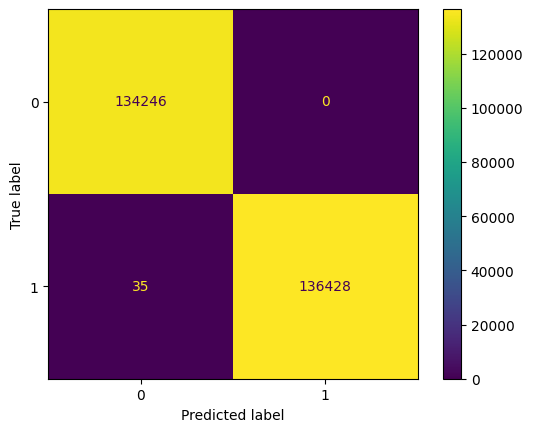

In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

cm = confusion_matrix(clf.predict(X), y)
cm_display = ConfusionMatrixDisplay(cm).plot()

TN,TP,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]
# Print some metrics alternative to prediction accuracy
print('True Negative rate (specificity): ', TN/(TN+FN))
print('True positive rate (recall): ', TP/(TP+FP))
print('False Negative Rate: ', 1-TP/(TP+FP))
print('False positive rate: ', 1-TN/(TN+FN))
print('Positive Likelihood ratio: ', TP/FP)

In [5]:
# Save model with pickle
import pickle
import os
models_dir = '..\models'

# Encoding of the filename is the following: modelname_KernelType_Cvalue_*otherParams.sav
filename = 'decision_tree.sav'
pickle.dump(clf, open(os.path.join(models_dir,filename), 'wb'))

In [21]:
from sklearn.model_selection import train_test_split, StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1) 

(54142, 13)

#### Apply to train

True Negative rate (specificity):  0.9995432513049962
True positive rate (recall):  1.0
False Negative Rate:  0.0
False positive rate:  0.00045674869500378357
Positive Likelihood ratio:  inf


C:\Users\valer\AppData\Local\Temp\ipykernel_20004\2757654811.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  print('Positive Likelihood ratio: ', TP/FP)


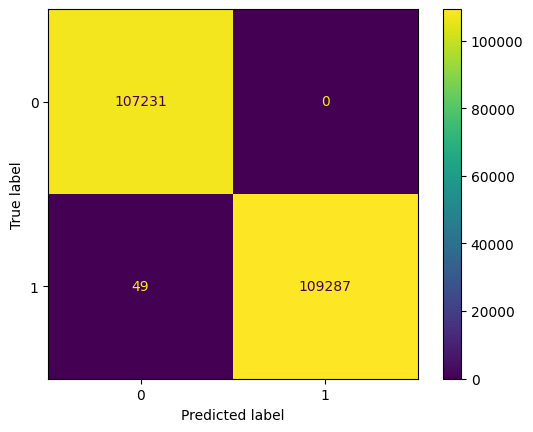

In [41]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=30)
clf = clf.fit(X_train, y_train)

cm = confusion_matrix(clf.predict(X_train), y_train)
cm_display = ConfusionMatrixDisplay(cm).plot()

TN,TP,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]
# Print some metrics alternative to prediction accuracy
print('True Negative rate (specificity): ', TN/(TN+FN))
print('True positive rate (recall): ', TP/(TP+FP))
print('False Negative Rate: ', 1-TP/(TP+FP))
print('False positive rate: ', 1-TN/(TN+FN))
print('Positive Likelihood ratio: ', TP/FP)

#### Apply to test

True Negative rate (specificity):  0.9954816488278212
True positive rate (recall):  1.0
False Negative Rate:  0.0
False positive rate:  0.004518351172178803
Positive Likelihood ratio:  inf


C:\Users\valer\AppData\Local\Temp\ipykernel_20004\1090652616.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  print('Positive Likelihood ratio: ', TP/FP)


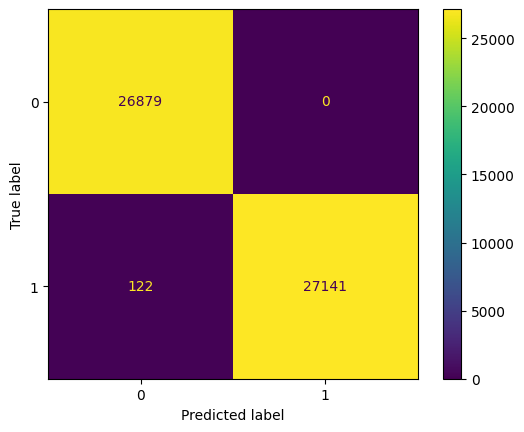

In [43]:
cm = confusion_matrix(clf.predict(X_test), y_test)
cm_display = ConfusionMatrixDisplay(cm).plot()

TN,TP,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]
# Print some metrics alternative to prediction accuracy
print('True Negative rate (specificity): ', TN/(TN+FN))
print('True positive rate (recall): ', TP/(TP+FP))
print('False Negative Rate: ', 1-TP/(TP+FP))
print('False positive rate: ', 1-TN/(TN+FN))
print('Positive Likelihood ratio: ', TP/FP)